# Statistical Analysis

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Chi- Square Test

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.select_dtypes(include = ['object','category']).columns

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

In [6]:
data = df[['sex','survived']]

In [7]:
data.head()

,sex,survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [8]:
contingency_table = pd.crosstab(data['sex'], data['survived'])
print(contingency_table)

survived    0    1
sex               
female     81  233
male      468  109


In [9]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Value:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


NameError: name 'chi2_contingency' is not defined

In [ ]:
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Create contingency table
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:\n", contingency_table)
print("Chi-Square Value:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("Conclusion: Gender and survival are related.")
else:
    print("Conclusion: Gender and survival are independent.")


Contingency Table:
 survived    0    1
sex               
female     81  233
male      468  109
Chi-Square Value: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of Freedom: 1
Expected Frequencies:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]
Conclusion: Gender and survival are related.


`Null Hypothesis :` The null hypothesis is a statement that there is no association or effect between variables.
In the context of the chi-square test above, it states that gender and survival are independent.

`Alternative Hypothesis :` The alternative hypothesis states that there **is an association** or effect between variables. In the chi-square test above, it means that **gender and survival are related**.

To perform a chi-square test between `sex` and `age`, you first need to categorize the `age` variable into bins (e.g., age groups) since the chi-square test requires categorical data. Here's how you can modify your code:



In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Categorize 'age' into bins
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 18, 35, 60, 80], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

# Drop rows with missing values in 'sex' or 'age_group'
titanic = titanic.dropna(subset=['sex', 'age_group'])

# Create contingency table
contingency_table = pd.crosstab(titanic['sex'], titanic['age_group'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:\n", contingency_table)
print("Chi-Square Value:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("Conclusion: Sex and age group are related.")
else:
    print("Conclusion: Sex and age group are independent.")

Contingency Table:
 age_group  Child  Young Adult  Adult  Senior
sex                                         
female        68          120     70       3
male          71          238    125      19
Chi-Square Value: 15.60602672696539
p-value: 0.0013656044430025733
Degrees of Freedom: 3
Expected Frequencies:
 [[ 50.81092437 130.86554622  71.28151261   8.04201681]
 [ 88.18907563 227.13445378 123.71848739  13.95798319]]
Conclusion: Sex and age group are related.




This code categorizes the `age` column into groups, creates a contingency table for `sex` and `age_group`, and performs the chi-square test.

## 2. Normal Distribution - Test

A **normal distribution test** checks if data follows a bell-shaped curve (normal distribution). It helps decide if statistical methods assuming normality can be used.

Here’s how you can create a histogram for the `age` column in the Titanic dataset:



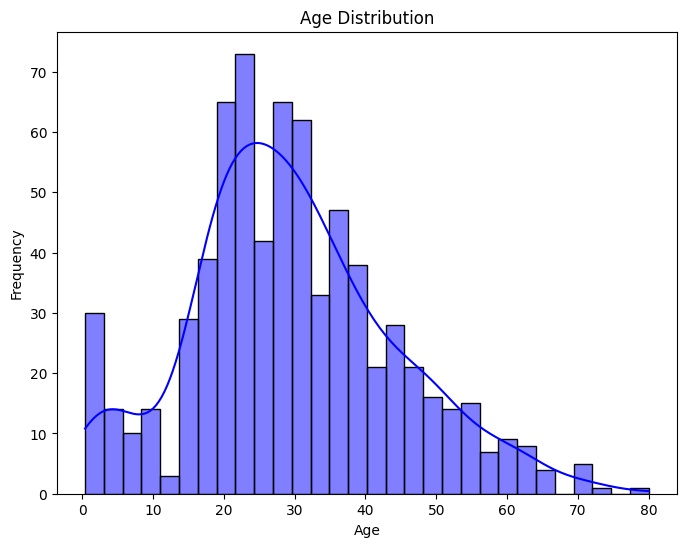

In [ ]:
# Drop rows with missing values in 'age'
titanic = titanic.dropna(subset=['age'])

# Create histogram for 'age'
plt.figure(figsize=(8, 6))
sns.histplot(titanic['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

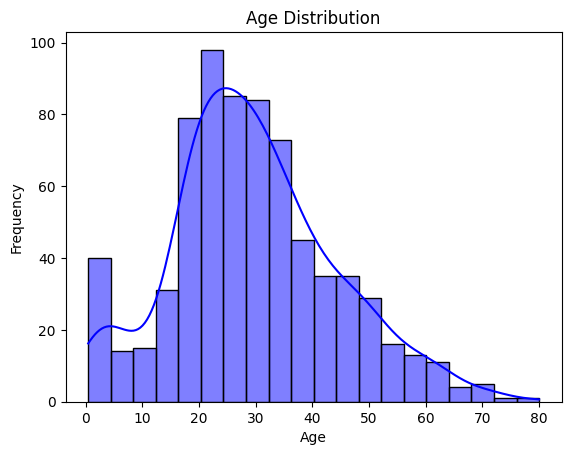

In [ ]:
sns.histplot(titanic['age'],kde = True, color = 'blue')
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Frequency")

Here’s how you can perform the **Shapiro-Wilk test** on the `age` column to check for normality:



In [ ]:
from scipy.stats import shapiro
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop rows with missing values in 'age'
titanic = titanic.dropna(subset=['age'])

# Perform Shapiro-Wilk test
stat, p = shapiro(titanic['age'])

# Output results
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p)

# Interpretation
if p > 0.05:
    print("Conclusion: The age data follows a normal distribution.")
else:
    print("Conclusion: The age data does not follow a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9814577414504954
p-value: 7.337348958673592e-08
Conclusion: The age data does not follow a normal distribution.




This code will test if the `age` column in the Titanic dataset follows a normal distribution. A **p-value > 0.05** indicates normality.

In [ ]:
stats,p = shapiro(titanic['fare'])

In [ ]:
arr = np.array([-09.7,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,90])

In [ ]:
q1 = np.quantile(arr, 0.25)
q3 = np.quantile(arr, 0.75)

In [ ]:
IQR = q3 - q1

In [ ]:
IQR

5.5

In [ ]:
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

In [ ]:
upper_bound

16.5

In [ ]:
lower_bound

-5.5

In [ ]:
arr = arr[(arr > lower_bound) & (arr < upper_bound)]

In [ ]:
arr

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
new = [i for i in arr if lower_bound <= i <= upper_bound]

In [ ]:
new

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

<Axes: >

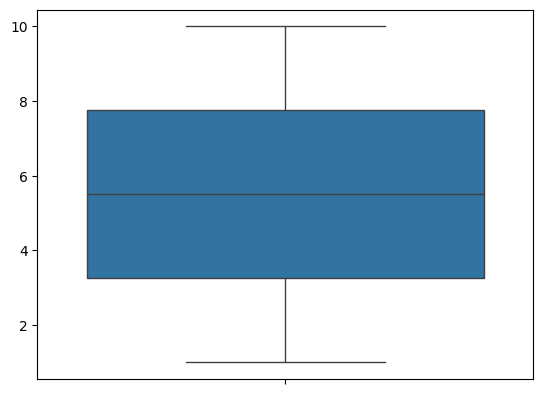

In [ ]:
sns.boxplot(arr)

In [ ]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,40])

<Axes: >

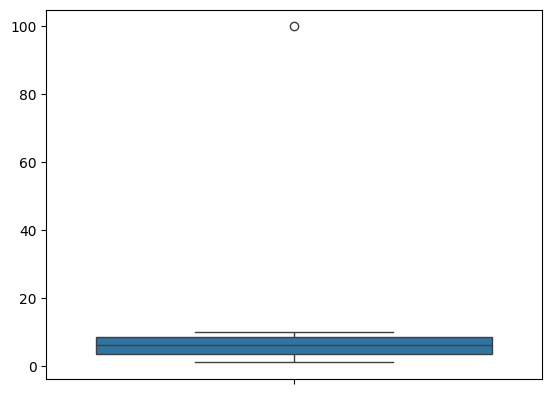

In [ ]:
sns.boxplot(arr)

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

<Axes: xlabel='age'>

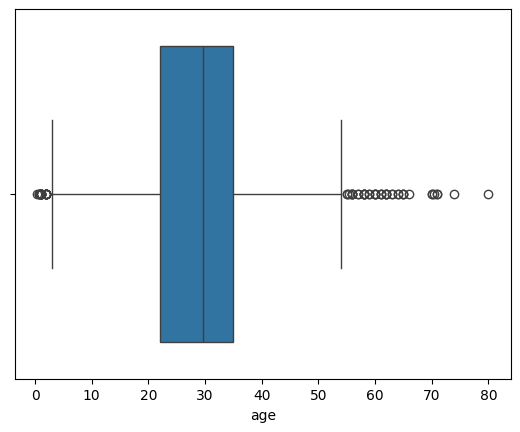

In [ ]:
sns.boxplot(x=df['age'])

In [ ]:
q1 = np.quantile(df['age'], 0.25)
q3 = np.quantile(df['age'], 0.75)

In [ ]:
IQR = q3 - q1

In [ ]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

In [ ]:
lower_bound

2.5

In [ ]:
upper_bound

54.5

In [ ]:
new_df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [ ]:
new_df['age'] = new_df['age'].fillna(new_df['age'].mean())

C:\Users\moham\AppData\Local\Temp\ipykernel_19388\2856273661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age'] = new_df['age'].fillna(new_df['age'].mean())


<Axes: xlabel='age'>

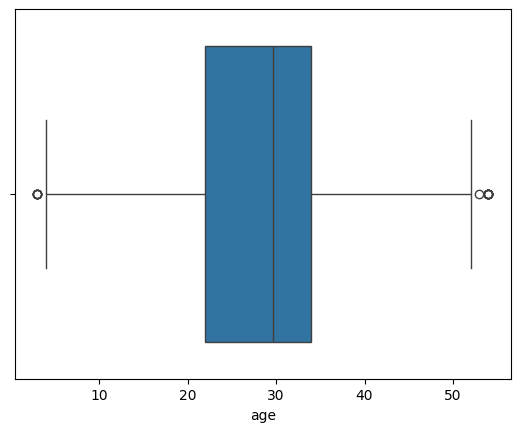

In [ ]:
sns.boxplot(x=new_df['age'])

In [ ]:
new_df['age'].min()

3.0

In [ ]:
new_df['age'].max()

54.0

In [ ]:
new_df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [ ]:
class_1 = new_df[new_df['pclass'] == 1]['age']
class_2 = new_df[new_df['pclass'] == 2]['age']
class_3 = new_df[new_df['pclass'] == 3]['age']

In [ ]:
from scipy.stats import f_oneway

In [ ]:
df['age'].isnull().sum()

0

In [ ]:
f_stats, p_value = f_oneway(class_1, class_2, class_3)

In [ ]:
f_stats, p_value

(36.960187336028945, 4.261751861369818e-16)

In [ ]:
new_df['age'] = new_df['age'].astype(int)

C:\Users\moham\AppData\Local\Temp\ipykernel_19388\482419166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age'] = new_df['age'].astype(int)


In [ ]:
new_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df['age'].corr(new_df['fare'])

0.09127836217590898

<Axes: xlabel='age', ylabel='fare'>

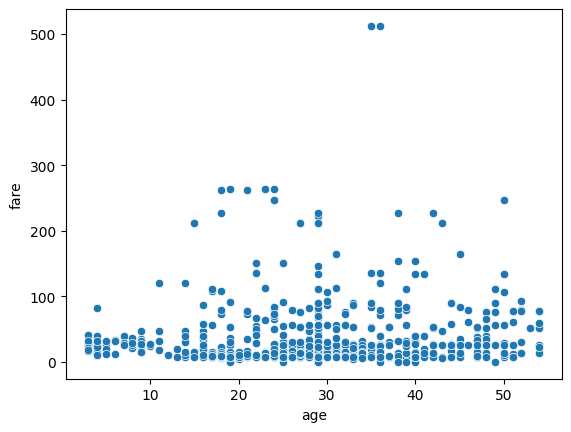

In [ ]:
sns.scatterplot(x='age', y='fare', data=new_df)

In [ ]:
# Create dataset
data = {
    'Study Hours': [2,3,4,5,6,7,8,9,10,11],
    'Sleep Hours': [8,7,6,6,5,5,4,4,3,3],
    'Exam Score': [55,60,68,75,80,85,88,92,95,98]
}

df_1 = pd.DataFrame(data)



In [ ]:
df_1['Study Hours'].corr(df_1['Exam Score'])

0.9861398899347419

<Axes: xlabel='Study Hours', ylabel='Exam Score'>

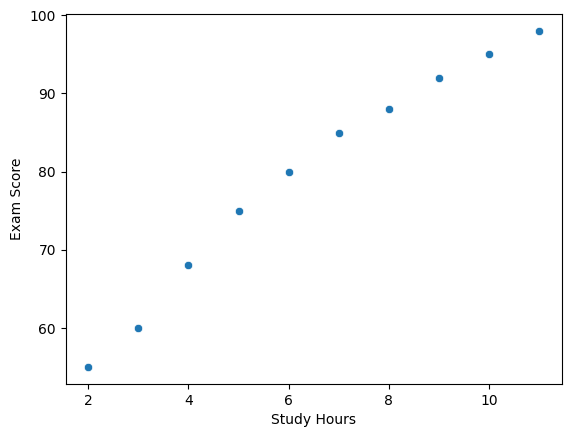

In [ ]:
sns.scatterplot(x='Study Hours', y='Exam Score', data=df_1)

In [ ]:
df_1['Sleep Hours'].std()

1.66332999331662

In [ ]:
df_1['Exam Score'].std()

14.811407015465404

Z-score: 6.92
Critical Z-value: ±1.96
Reject H0 → The average height is significantly different from 165 cm.


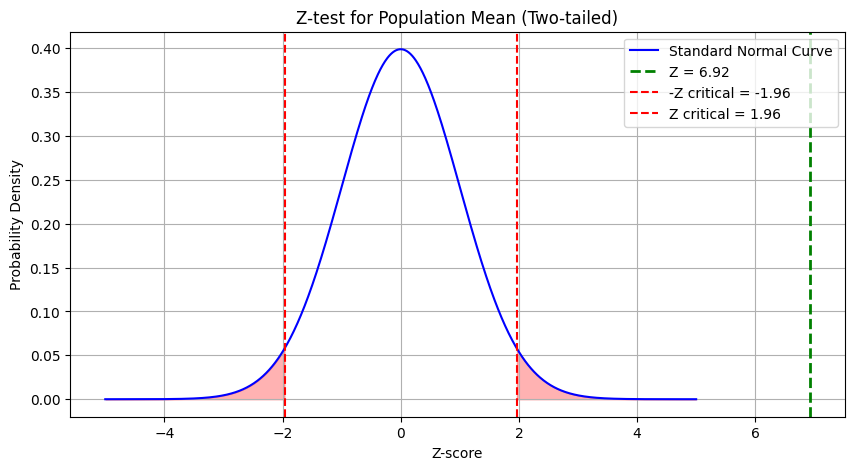

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given data
population_mean = 165      # µ
population_std = 3.9       # σ
sample_mean = 169.5        # x̄
sample_size = 36           # n
alpha = 0.05               # 95% confidence

# Step 1: Calculate Z-score
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Step 2: Critical Z-value (two-tailed)
z_critical = norm.ppf(1 - alpha/2)  # 1.96 for 95% confidence

# Step 3: Print results
print(f"Z-score: {z_score:.2f}")
print(f"Critical Z-value: ±{z_critical:.2f}")

if abs(z_score) > z_critical:
    print("Reject H0 → The average height is significantly different from 165 cm.")
else:
    print("Fail to Reject H0 → No significant difference from 165 cm.")

# Step 4: Visualization
x = np.linspace(-5, 5, 1000)  # X-axis for standard normal
y = norm.pdf(x, 0, 1)         # Standard normal distribution

plt.figure(figsize=(10, 5))

# Plot the bell curve
plt.plot(x, y, color='blue', label='Standard Normal Curve')

# Shade rejection regions (two-tailed)
plt.fill_between(x, y, where=(x <= -z_critical), color='red', alpha=0.3)
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.3)

# Plot calculated Z-score
plt.axvline(z_score, color='green', linestyle='--', linewidth=2, label=f'Z = {z_score:.2f}')

# Add critical lines
plt.axvline(-z_critical, color='red', linestyle='--', label=f'-Z critical = {-z_critical:.2f}')
plt.axvline(z_critical, color='red', linestyle='--', label=f'Z critical = {z_critical:.2f}')

# Labels & title
plt.title("Z-test for Population Mean (Two-tailed)")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


t-score: 10.95
Critical t-value: ±2.05
Reject H0 → The medication significantly affects IQ.


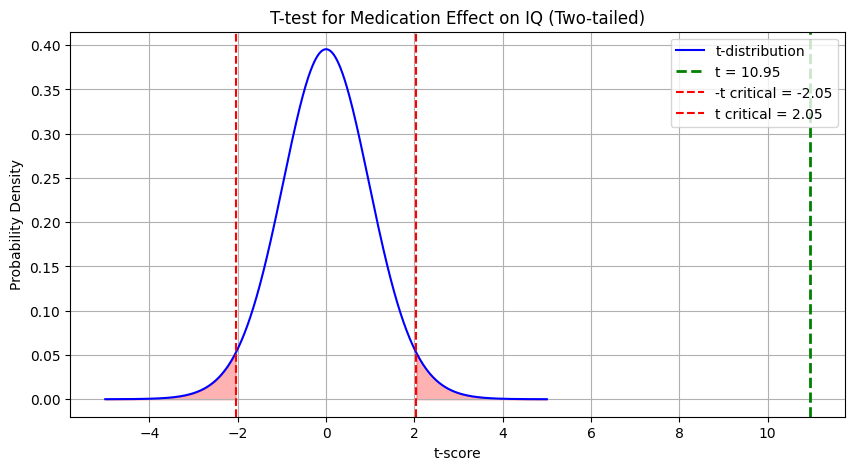

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Given data
population_mean = 100
sample_mean = 140
sample_std = 20
sample_size = 30
alpha = 0.05

# Step 1: Calculate t-score
t_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Degrees of freedom
df = sample_size - 1

# Critical t-value for two-tailed test
t_critical = t.ppf(1 - alpha/2, df)

# Print results
print(f"t-score: {t_score:.2f}")
print(f"Critical t-value: ±{t_critical:.2f}")

if abs(t_score) > t_critical:
    print("Reject H0 → The medication significantly affects IQ.")
else:
    print("Fail to Reject H0 → No significant effect on IQ.")

# Visualization
x = np.linspace(-5, 5, 1000)
y = t.pdf(x, df)

plt.figure(figsize=(10, 5))
plt.plot(x, y, color='blue', label='t-distribution')

# Shade rejection areas
plt.fill_between(x, y, where=(x <= -t_critical), color='red', alpha=0.3)
plt.fill_between(x, y, where=(x >= t_critical), color='red', alpha=0.3)

# Plot t-score
plt.axvline(t_score, color='green', linestyle='--', linewidth=2, label=f't = {t_score:.2f}')

# Add critical lines
plt.axvline(-t_critical, color='red', linestyle='--', label=f'-t critical = {-t_critical:.2f}')
plt.axvline(t_critical, color='red', linestyle='--', label=f't critical = {t_critical:.2f}')

plt.title("T-test for Medication Effect on IQ (Two-tailed)")
plt.xlabel("t-score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
%%time
# Given probabilities
P_own = 0.60                # P(Owns a bicycle)
P_not_own = 1 - P_own        # P(Does not own a bicycle)

P_bike_given_own = 0.30      # P(Has bicycle at school | Owns)
P_bike_given_not_own = 0.10  # P(Has bicycle at school | Does not own)

# Bayes Theorem:
# P(Owns | Has bicycle at school) = [P(Has bicycle at school | Owns) * P(Owns)] / P(Has bicycle at school)

# First, calculate P(Has bicycle at school)
P_bike_at_school = (P_bike_given_own * P_own) + (P_bike_given_not_own * P_not_own)

# Apply Bayes Theorem
P_own_given_bike = (P_bike_given_own * P_own) / P_bike_at_school

# Print result
print(f"Probability that the student owns a bicycle given they have one at school: {P_own_given_bike:.2%}")


Probability that the student owns a bicycle given they have one at school: 81.82%
CPU times: total: 0 ns
Wall time: 0 ns
